In [1]:
from src.codeGameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import gameBoardDisplay as gbd

from typing import List

import locale

import numpy as np

from helpers import colorboxplot, makeVlines, zeichneErrechnetenWert, makeHistogram, colors
from src.codeGameSimulation.store2db import getDataFromDB, getGameFromDB, getGSFromDB

# %config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import matplotlib.ticker as mt
import matplotlib.patches as mp

locale.setlocale(locale.LC_NUMERIC, "german")

mplstyle.use("fast")
mplstyle.use("default")


In [2]:
db_dir = "D:/Uni/BA/data/"
db_filename = "gameHistories_strategy_versus"


prefix_graphics = "Strategievergleich: "
graphic_dir = "Strategievergleich_untereinander"


In [3]:
ids, roundCounts, _, winners, settingsIDs = getDataFromDB(db_dir, db_filename)
gs_unordered = getGSFromDB(db_dir, db_filename)
print([len(id) for id in ids])
settingsIDs


db load finished after 0:00:01.912431
sort finished after 0:00:00.026006
groupby finished after 0:00:00.024005
sort finished after 0:00:00.105023
split finished after 0:00:01.015230
settings loaded
[20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000, 20000]


[6, 9, 10, 5, 11, 14, 2, 8, 7, 13, 1, 4, 15, 3, 12, 0]

In [4]:
labels_unordered = [" vs ".join([p.getStrategy().getFigName() for p in gs_.getPlayers()]) for gs_ in gs_unordered]

labels_unordered


['MoveLast vs MoveLast',
 'MoveFirst vs MoveLast',
 'Score MF nF vs MoveLast',
 'Zufall vs MoveLast',
 'MoveLast vs MoveFirst',
 'MoveFirst vs MoveFirst',
 'Score MF nF vs MoveFirst',
 'Zufall vs MoveFirst',
 'MoveLast vs Score MF nF',
 'MoveFirst vs Score MF nF',
 'Score MF nF vs Score MF nF',
 'Zufall vs Score MF nF',
 'MoveLast vs Zufall',
 'MoveFirst vs Zufall',
 'Score MF nF vs Zufall',
 'Zufall vs Zufall']

In [5]:
avg_len =[np.mean(rc) for rc in roundCounts]



In [6]:
def sort_on_other_list(list_to_sort: List[object], sortabel_list: List[object]):
    if len(set(sortabel_list)) != len(sortabel_list) or len(list_to_sort) != len(sortabel_list):
        print("cant sort because of equal values or not matching dimensions")
        print("len set sortable list: ", len(set(sortabel_list)))
        print("len sortable list: ", len(sortabel_list))
        print("len list_to_sort: ", len(list_to_sort))
        return
    else:
        sorted_list = sortabel_list.copy()
        sorted_list.sort()
        return [list_to_sort[sortabel_list.index(x)] for x in sorted_list]


In [7]:
sort_on_other_list(labels_unordered, settingsIDs), [labels_unordered[settingsIDs.index(x)] for x in settingsIDs],
settingsIDs,sort_on_other_list(settingsIDs,avg_len)
[labels_unordered[i] for i in sort_on_other_list(settingsIDs, avg_len)]


['Score MF nF vs Score MF nF',
 'MoveFirst vs Score MF nF',
 'Score MF nF vs MoveFirst',
 'MoveFirst vs MoveFirst',
 'Score MF nF vs Zufall',
 'Zufall vs Score MF nF',
 'Score MF nF vs MoveLast',
 'MoveLast vs Score MF nF',
 'MoveFirst vs Zufall',
 'Zufall vs MoveFirst',
 'MoveFirst vs MoveLast',
 'MoveLast vs MoveFirst',
 'Zufall vs Zufall',
 'Zufall vs MoveLast',
 'MoveLast vs Zufall',
 'MoveLast vs MoveLast']

In [8]:

        

sorted_rc = sort_on_other_list(roundCounts, avg_len)
sorted_labels = [labels_unordered[i] for i in sort_on_other_list(settingsIDs, avg_len)]
sorted_winners = sort_on_other_list(winners, avg_len)
colors = sort_on_other_list(list(colors)[:len(avg_len)], avg_len)
colors,sorted_labels

cant sort because of equal values or not matching dimensions
len set sortable list:  16
len sortable list:  16
len list_to_sort:  10


(None,
 ['Score MF nF vs Score MF nF',
  'MoveFirst vs Score MF nF',
  'Score MF nF vs MoveFirst',
  'MoveFirst vs MoveFirst',
  'Score MF nF vs Zufall',
  'Zufall vs Score MF nF',
  'Score MF nF vs MoveLast',
  'MoveLast vs Score MF nF',
  'MoveFirst vs Zufall',
  'Zufall vs MoveFirst',
  'MoveFirst vs MoveLast',
  'MoveLast vs MoveFirst',
  'Zufall vs Zufall',
  'Zufall vs MoveLast',
  'MoveLast vs Zufall',
  'MoveLast vs MoveLast'])

7


TypeError: 'NoneType' object is not subscriptable

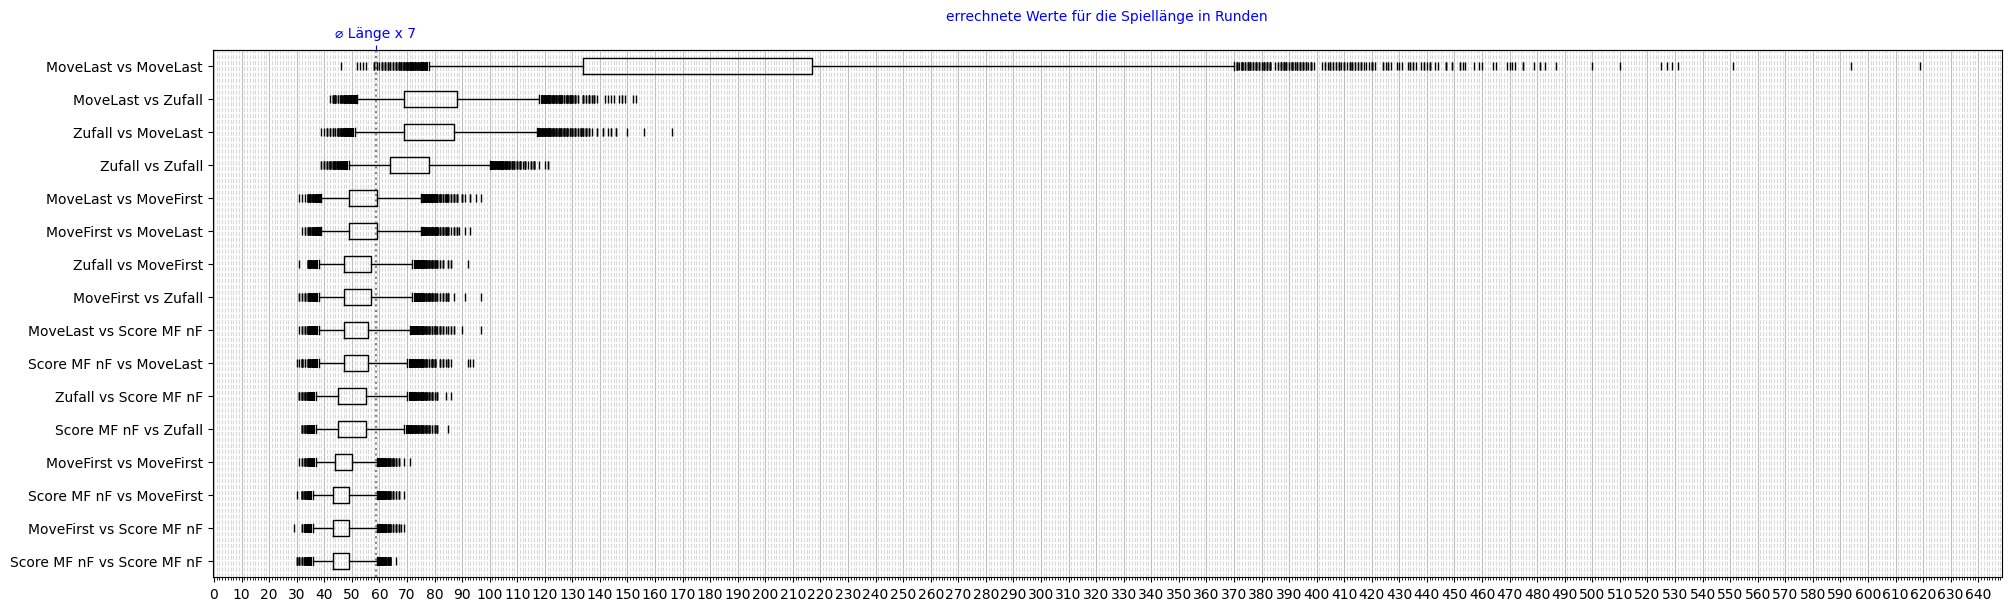

In [9]:
figRounds, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[ 20, 6], layout="constrained")
# ax2 = plt.twinx(ax["Boxplots Runden"])
# makeHistogram(ax2,[rc],[""],colors[0],fill=False)
# ax2.set_ylabel("Wahrschenlichkeit")
zeichneErrechnetenWert(ax["Boxplots Runden"], "r", 7)

colorboxplot(sorted_rc, ax["Boxplots Runden"], sorted_labels, colors, ncol=1, majorMultiple=10)
ax["Boxplots Runden"].set_title(prefix_graphics+"Spiellänge in Runden")
ax["Boxplots Runden"].set_xlabel('empirisch bestimmte Spiellänge in Runden')
ax["Boxplots Runden"].set_xlim((20, 375))
for txt in ax["Boxplots Runden"].texts:
    if txt.get_position()[0] > 375:
        print(txt.get_text())
        txt.set_text(txt.get_text()+"→")
        txt.set_x(375)


In [ ]:

roundInfo=[{"Strategie": sorted_labels[i],
    "avg": np.mean(rc),
    "min": np.min(rc),
    "max": np.max(rc),
  "p1": np.percentile(rc, 1),
  "p25": np.percentile(rc, 25),
  "p50": np.percentile(rc, 50),
  "p75": np.percentile(rc, 75),
  "p99": np.percentile(rc, 99),
  "min_count": rc.count(np.min(rc)),
  "max_count": rc.count(np.max(rc)),
  "samplesize": len(rc),
  }for i, rc in enumerate(sorted_rc)]

# roundInfo



In [ ]:
tmp = " \\\\\n".join([str("{Strategie} & {avg:3.2f} & {min:3.0f} & {max:3.0f} & {p1:3.0f} & {p25:3.0f} & {p50:3.0f} & {p75:3.0f} & {p99:3.0f} & {samplesize}".format(**ri)) for ri in roundInfo])
print(tmp+"\\\\")


Score MF nF vs Score MF nF & 45.96 &  28 &  75 &  36 &  43 &  46 &  49 &  59 & 200000 \\
MoveFirst vs Score MF nF & 46.09 &  27 &  73 &  36 &  43 &  46 &  49 &  59 & 200000 \\
Score MF nF vs MoveFirst & 46.23 &  28 &  76 &  36 &  43 &  46 &  49 &  59 & 200000 \\
MoveFirst vs MoveFirst & 46.87 &  30 &  76 &  37 &  44 &  47 &  50 &  59 & 200000 \\
Score MF nF vs MoveLast & 51.60 &  30 &  97 &  38 &  47 &  51 &  56 &  71 & 200000 \\
MoveLast vs Score MF nF & 51.71 &  31 & 101 &  38 &  47 &  51 &  56 &  71 & 200000 \\
MoveFirst vs MoveLast & 54.05 &  30 & 100 &  39 &  49 &  53 &  59 &  75 & 200000 \\
MoveLast vs MoveFirst & 54.31 &  30 & 104 &  39 &  49 &  54 &  59 &  75 & 200000 \\
MoveLast vs MoveLast & 181.55 &  47 & 627 &  78 & 135 & 172 & 218 & 371 & 200000\\


## Histogramme


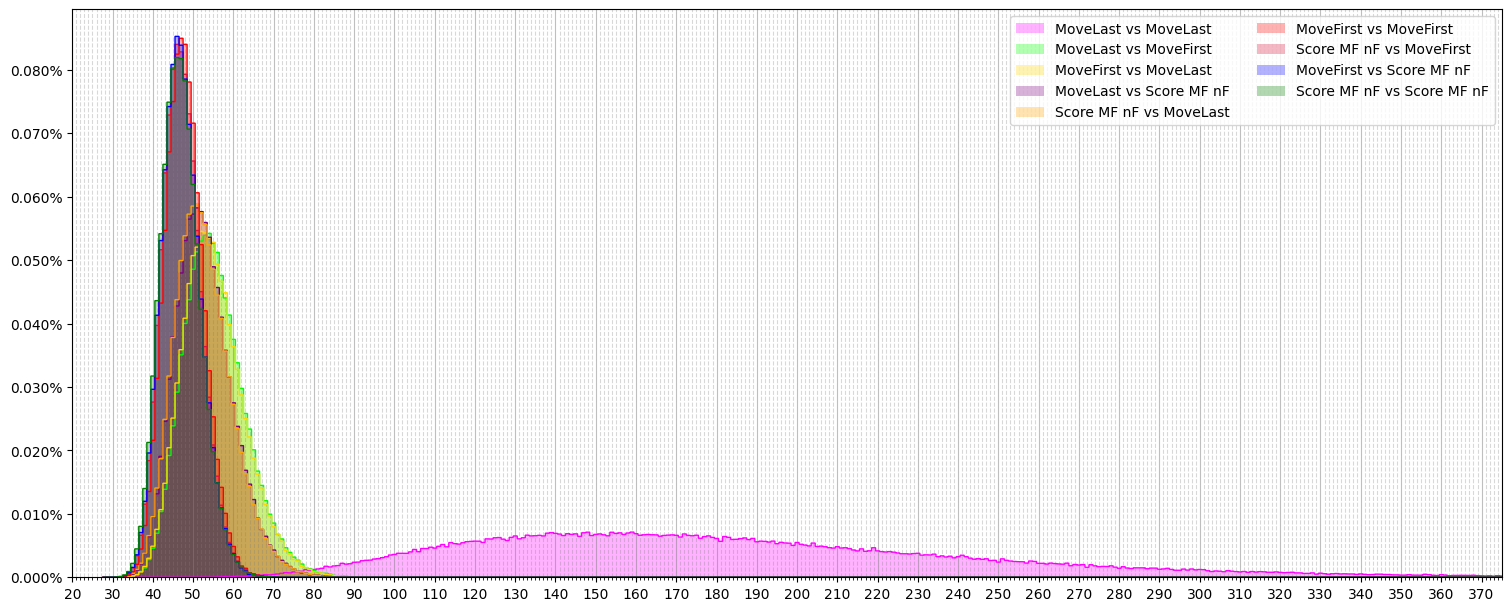

In [ ]:
figHist, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[15, 6], layout="constrained")

makeHistogram(sorted_rc, ax["Boxplots Runden"], sorted_labels, colors, ncol=2, majorMultiple=10)
ax["Boxplots Runden"].set_xlim((20, 375))

for txt in ax["Boxplots Runden"].texts:
    if txt.get_position()[0] > 375:
        print(txt.get_text())
        txt.set_text(txt.get_text()+"→")
        txt.set_x(375)


In [ ]:
[x for x in enumerate(sorted_labels)]

[(0, 'Score MF nF vs Score MF nF'),
 (1, 'MoveFirst vs Score MF nF'),
 (2, 'Score MF nF vs MoveFirst'),
 (3, 'MoveFirst vs MoveFirst'),
 (4, 'Score MF nF vs MoveLast'),
 (5, 'MoveLast vs Score MF nF'),
 (6, 'MoveFirst vs MoveLast'),
 (7, 'MoveLast vs MoveFirst'),
 (8, 'MoveLast vs MoveLast')]

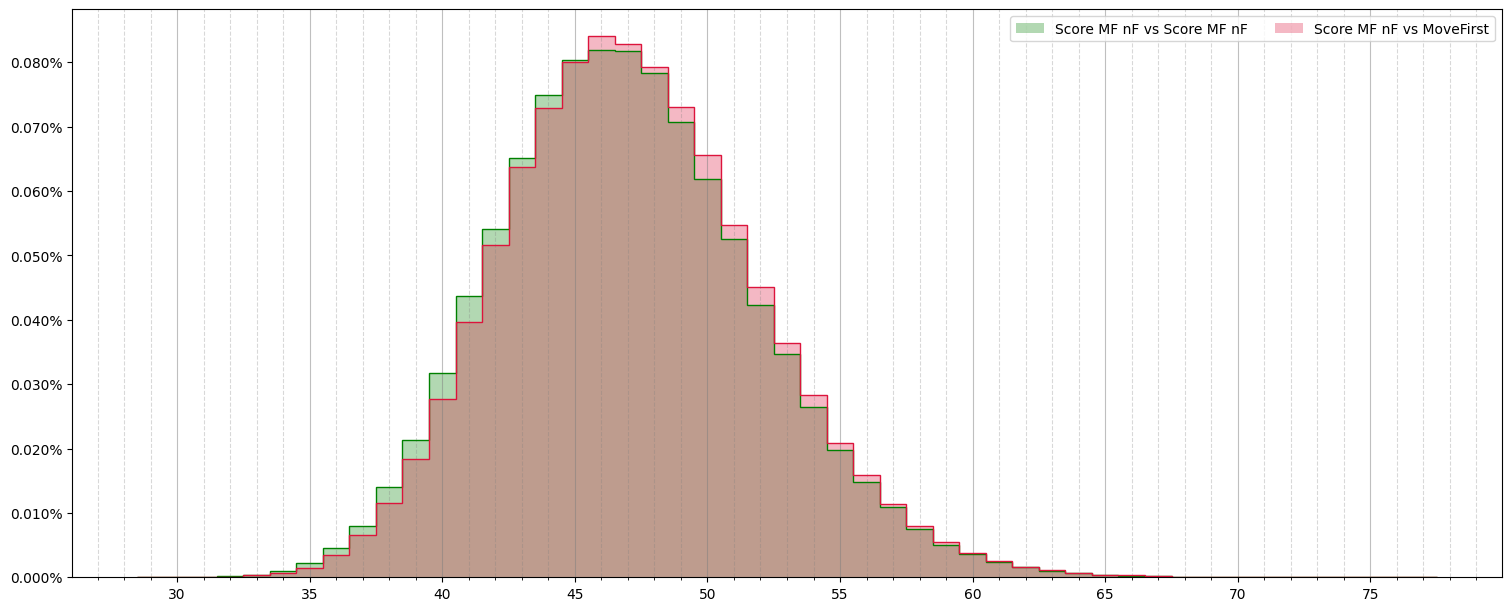

In [ ]:
IDs = [2,0]
figHist2, ax = plt.subplot_mosaic([["Boxplots Runden"]], figsize=[15, 6], layout="constrained")

makeHistogram([sorted_rc[i] for i in IDs], ax["Boxplots Runden"], [sorted_labels[i] for i in IDs], [colors[i] for i in IDs])


C:\Users\walli\AppData\Local\Temp/ipykernel_15408/3564363989.py:55: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.tight_layout()


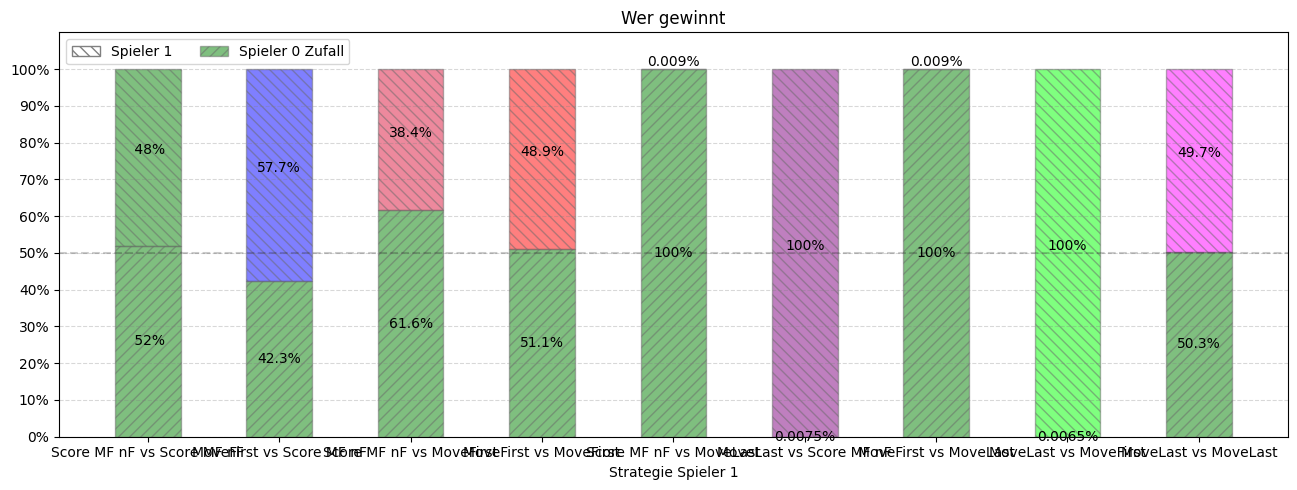

In [ ]:
def wer_gewinnt(winners,labels, figsize=[15, 5]):

    player0 = [s.count(["p0"]) / len(s) * 100 for s in winners]
    player1 = [s.count(["p1"]) / len(s) * 100 for s in winners]
    no_one = [s.count([]) / len(s) * 100 for s in winners]
    # both = [s.count(["p0", "p1"]) / len(s) * 100 for s in winners]
    # print(player0)
    # print(player1)

    fig, ax = plt.subplots(figsize=figsize, layout="constrained")
    # hat_graph(ax, xlabels, [player0, player1], ['Player 0', 'Player 1'])

    p0 = ax.bar(
        labels,
        player0,
        label="Spieler 0 Zufall",
        alpha=0.5,
        width=0.5,
        color=colors[0],
        hatch="///",
        edgecolor="dimgray",
    )
    p1 = ax.bar(
        labels,
        player1,
        label="Spieler 1",
        alpha=0.5,
        width=0.5,
        bottom=player0,
        color=colors,
        hatch="\\\\\\",
        edgecolor="dimgray",
    )
    # ab = ax.bar(labels, no_one, label="Abbruch", alpha=.5, width=.5, color=colors,
    #             hatch="...", bottom=[sum(x) for x in zip(player0, player1)])
    # ev = ax.bar(labels, both, label="Unentschieden", alpha=.5, width=.5, color=colors,
    #             hatch="***", bottom=[sum(x) for x in zip(player0, player1, no_one)])

    ax.bar_label(p0, label_type="center", fmt="%3.3g%%", padding=0)
    ax.bar_label(p1, label_type="center", fmt="%3.3g%%", padding=5)
    # ax.bar_label(ab, label_type='center', fmt=" "*10+"%3.2g%%", padding=5)
    # ax.bar_label(ev, label_type='center', fmt="%3.5g%%"+" "*30, padding=5)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel("Strategie Spieler 1")
    ax.set_title("Wer gewinnt")
    # ax.legend( loc='lower center', ncol=2)
    
    legendItem = mp.Patch(facecolor='none', edgecolor='gray', hatch="\\\\\\",
          label='Spieler 1')
    ax.legend(loc="upper left", ncol=2, handles=[legendItem,p0])
    ax.axhline(50, color=(0, 0, 0, 0.2), ls="--")

    fig.tight_layout()
    ax.set_yticks(np.linspace(0, 100, 11))

    ax.set_ylim(0,110)
    ax.yaxis.set_major_formatter(mt.PercentFormatter())
    ax.grid(axis="y", color=("gray"), alpha=0.3, ls="--")
    

    return fig

figWinners= wer_gewinnt(sorted_winners,sorted_labels,[13, 5])

## Speichern der Grafiken

In [ ]:
figRounds.savefig("../../tex/game_ur_ba_thesis/img/Grafiken/Strategien/Vergleich_untereinander/rounds.png", dpi=300,)
figHist.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Strategien/Vergleich_untereinander/Histogramm.png", dpi=300,)
figWinners.savefig( "../../tex/game_ur_ba_thesis/img/Grafiken/Strategien/Vergleich_untereinander/Winner.png", dpi=300,)